### Hello all

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats

In [47]:
data = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', index_col = 0)
data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [48]:
data.shape

(22699, 17)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

In [50]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [51]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


##### Relationship between payment type and the fare amount the customer pays.

Payment_type

1: Credit card
2: Cash
3: No charge
4: Dispute
5: Unknown

In [52]:
data['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [53]:
# Drop unusual data
data = data[data['fare_amount'] > 0]

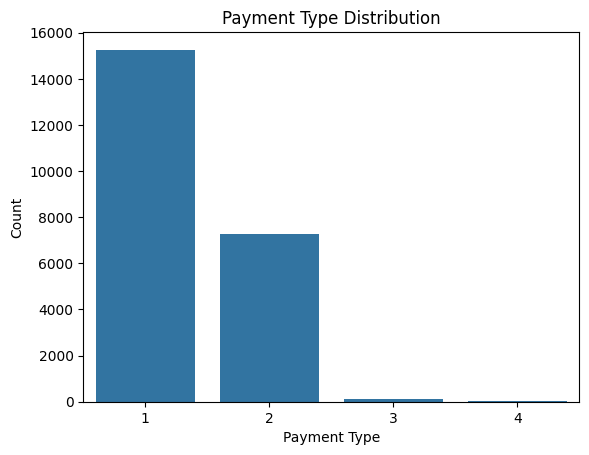

In [54]:
payment_type_val = data['payment_type'].value_counts().reset_index()
payment_type_val.columns = ['payment_type', 'count']
sns.barplot(x='payment_type', y='count', data=payment_type_val)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Type Distribution')
plt.show()

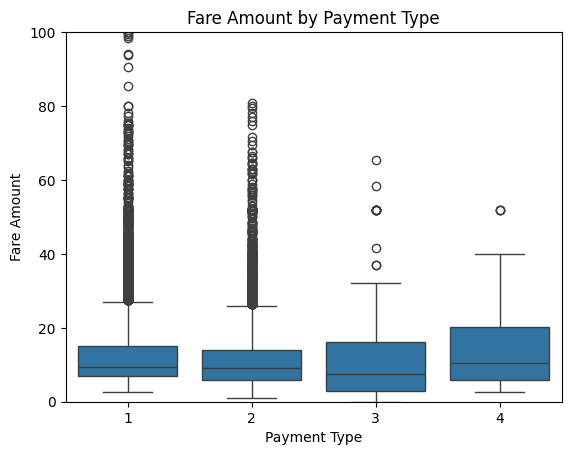

In [55]:
sns.boxplot(x='payment_type', y='fare_amount', data=data)
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.title('Fare Amount by Payment Type')
plt.ylim(0, 100)
plt.show()

Based on above chart, it shows customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash.

______

𝐻0
 : There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

𝐻𝐴
: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [76]:
cash_n_card = data[(data['payment_type']==1) | (data['payment_type']==2)]

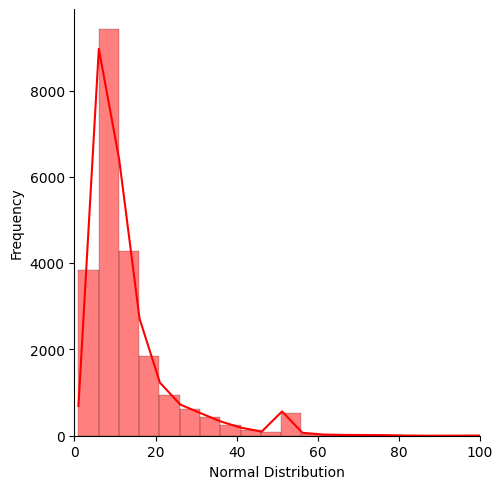

In [81]:
sns.displot(cash_n_card['fare_amount'], bins=200, kde=True, color='red')
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.show()


The chart is not normal distribution. So I try transformation.

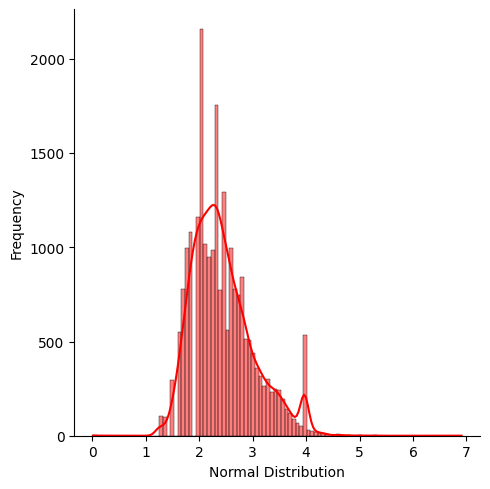

In [68]:
# Apply Log
data['fare_amount_log'] = np.log(data['fare_amount']+ 1)
sns.displot(data['fare_amount_log'], bins=100, kde=True, color='red')
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.show()

Again, this is not normal distrubution. But the dataset is large, so I can consider to use t-test. 

In [89]:
cash

Series([], Name: fare_amount, dtype: float64)

In [94]:
cash_n_card['payment_type'].value_counts()

payment_type
1    15262
2     7266
Name: count, dtype: int64

In [95]:
card = cash_n_card[cash_n_card['payment_type'] == 1]['fare_amount']
cash = cash_n_card[cash_n_card['payment_type'] == 2]['fare_amount']

scipy.stats.levene(card, cash, center='mean')

LeveneResult(statistic=14.883271145543668, pvalue=0.00011469122073609958)

Since the p-value for the Levene test is less than 0.05, the hypothesis that the variances are equal is rejected.

In [97]:
scipy.stats.ttest_ind(card, cash, equal_var = False)

TtestResult(statistic=6.871671010169566, pvalue=6.5699264341219305e-12, df=16673.643571996297)

Since the p-value is less than 0.05, we can conclude that there is a statistically significant difference between card and cash.

Q1. What business insight(s) can you draw from the result of your hypothesis test?

Answer: Customers to pay with credit cards can generate more revenue for taxi cab drivers

Q2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

Answer: Customer may not bring enough money to pay a longer trip (higher amount) in order to choose a different payment method than cash. Theremore, the amount may more likely to determines the payments type.

Testing
